In [113]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter, OrderedDict

In [114]:
steam_df = pd.read_csv("steam_updated.csv")
steam_df

,Unnamed: 0,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,...,negative_ratings,average_playtime,median_playtime,owners,price,windows,linux,mac,rating,totalRatings
0,0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,...,3339,17612,317,15000000.0,7.19,1,1,1,97.388815,127873
1,1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,...,633,277,62,7500000.0,3.99,1,1,1,83.978740,3951
2,2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,...,398,187,34,7500000.0,3.99,1,1,1,89.564761,3814
3,3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,...,267,258,184,7500000.0,3.99,1,1,1,82.662338,1540
4,4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,...,288,624,415,7500000.0,3.99,1,1,1,94.799567,5538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27068,27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,...,0,0,0,10000.0,2.09,1,0,0,100.000000,3
27069,27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,...,1,0,0,10000.0,1.69,1,0,0,88.888889,9
27070,27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,...,1,0,0,10000.0,3.99,1,0,0,0.000000,1
27071,27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,...,0,0,0,10000.0,5.19,1,0,1,100.000000,2


# The 7 best rated games

In [115]:
steam_cut = steam_df[['name','positive_ratings']]
steam_cut = steam_cut.sort_values('positive_ratings', ascending=False).reset_index()
steam_cut = steam_cut.loc[:6,:]

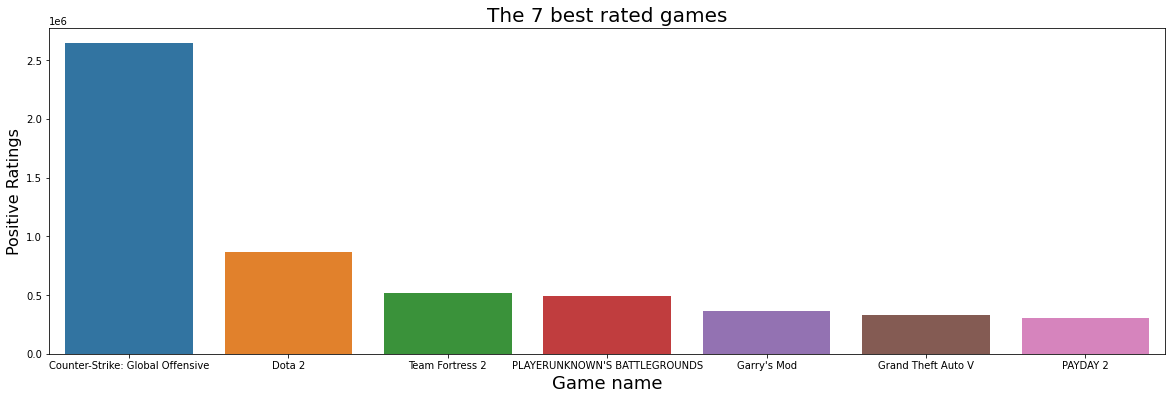

In [116]:
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.barplot(x="name", y="positive_ratings", data=steam_cut)
plt.title('The 7 best rated games', fontsize=20)
plt.xlabel('Game name', fontsize=18)
plt.ylabel('Positive Ratings', fontsize=16)
plt.show()

# Game releases per year on steam since 1997

In [117]:
date_count = {}

date_count = [x.split('-')[0] for x in steam_df['release_date']]
keys = Counter(date_count).keys()
values = Counter(date_count).values()

dict_date_count = dict(zip(keys, values))
dict_date_count = {int(k):v for k,v in dict_date_count.items()}

dict_date_count = OrderedDict(sorted(dict_date_count.items()))
dict_date_count = dict(dict_date_count)

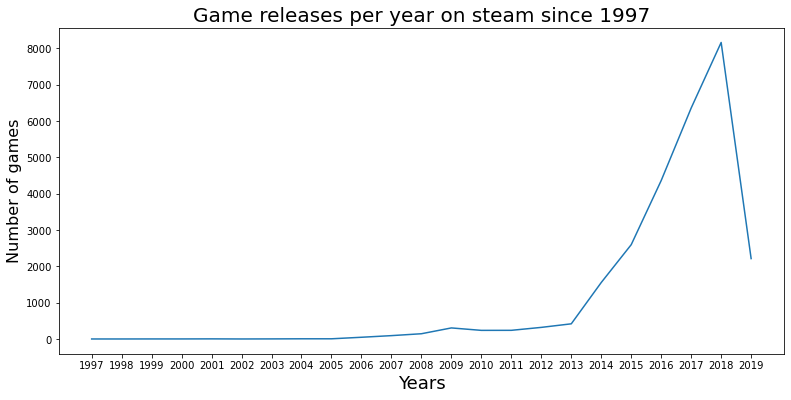

In [118]:
plt.subplots(figsize=(13,6))
plt.plot(range(len(dict_date_count)), list(dict_date_count.values()))
plt.xticks(range(len(dict_date_count)), list(dict_date_count.keys()))
plt.title('Game releases per year on steam since 1997', fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of games', fontsize=16)

plt.show()